<a href="https://colab.research.google.com/github/Ritesh-GitHub-Ranjan/Real-Estate-Price-Prediction/blob/main/Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARIES AND DATASETS

In [1]:
# Import Necessary Libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset.
house_df = pd.read_csv('realestate_prices.csv', encoding = 'ISO-8859-1')

In [4]:
# Display the DataFrame.
house_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:
# Display the first 7 rows of the DataFrame.
house_df.head(7)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819


In [6]:
# Display the last 7 rows of the DataFrame.
house_df.tail(7)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21606,7936000429,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
21607,2997800021,20150219T000000,475000.0,3,2.50,1310,1294,2.0,0,0,...,8,1180,130,2008,0,98116,47.5773,-122.409,1330,1265
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
# Display information about the DataFrame.
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# DATA VISUALIZATION

<Axes: xlabel='sqft_living', ylabel='price'>

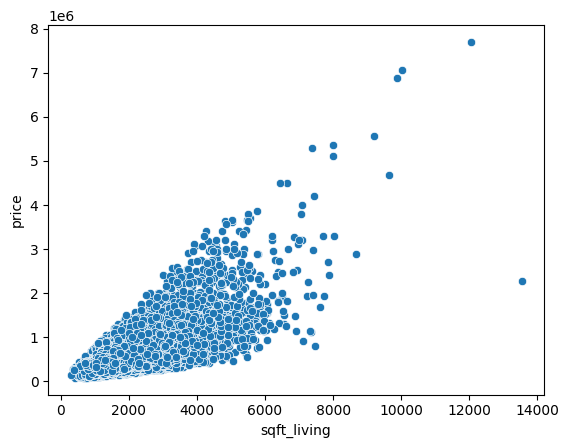

In [8]:
# Plot a scatterplot of square footage of living area vs. price

sns.scatterplot(x = "sqft_living", y = "price", data = house_df)

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

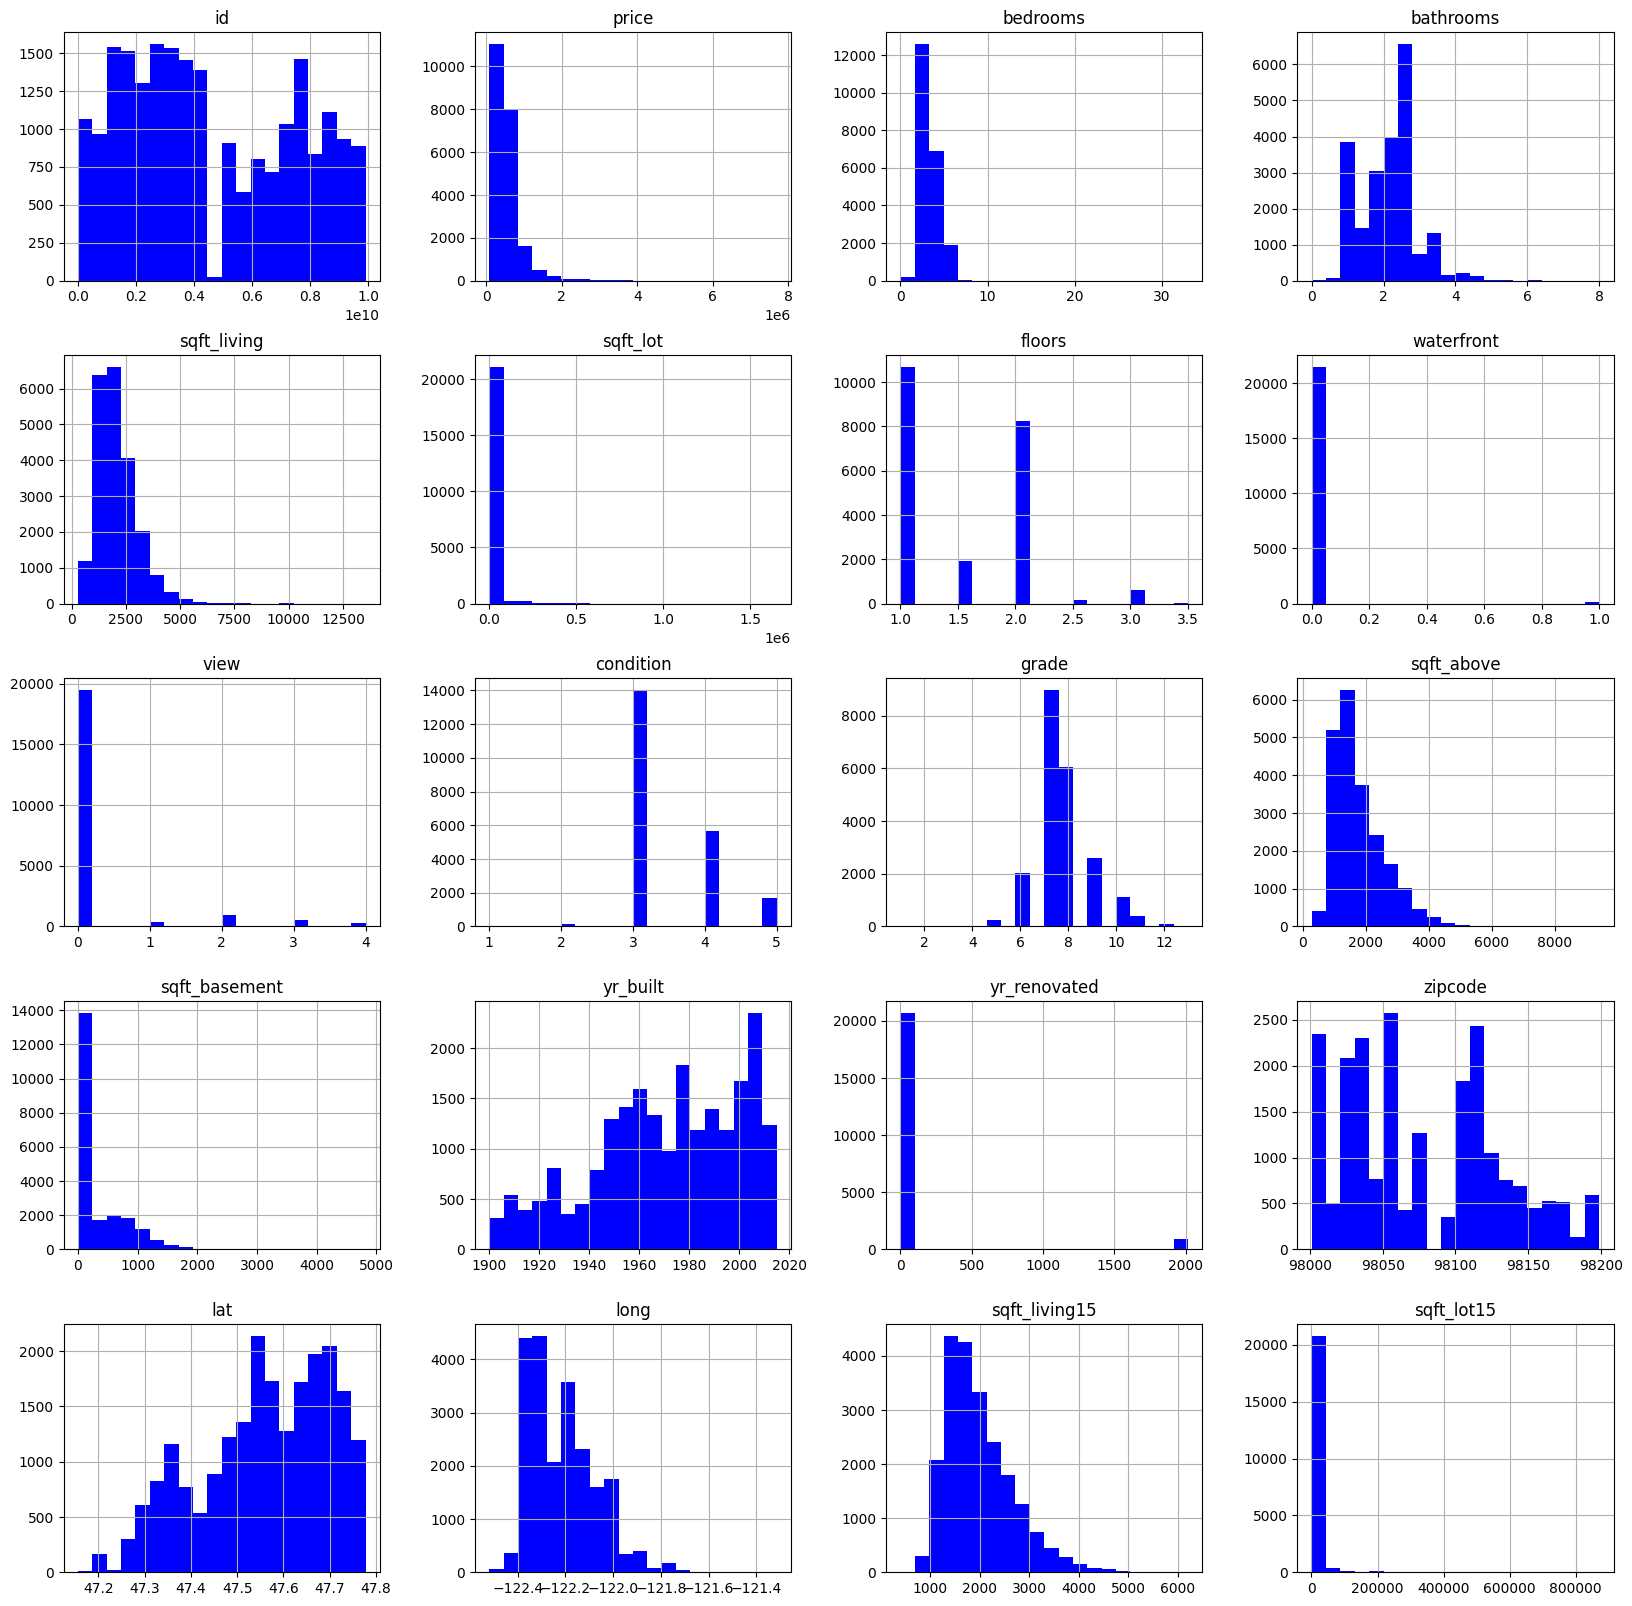

In [9]:
# Plot histograms for numerical features
house_df.hist(bins = 20, figsize = (20,20), color = 'b')

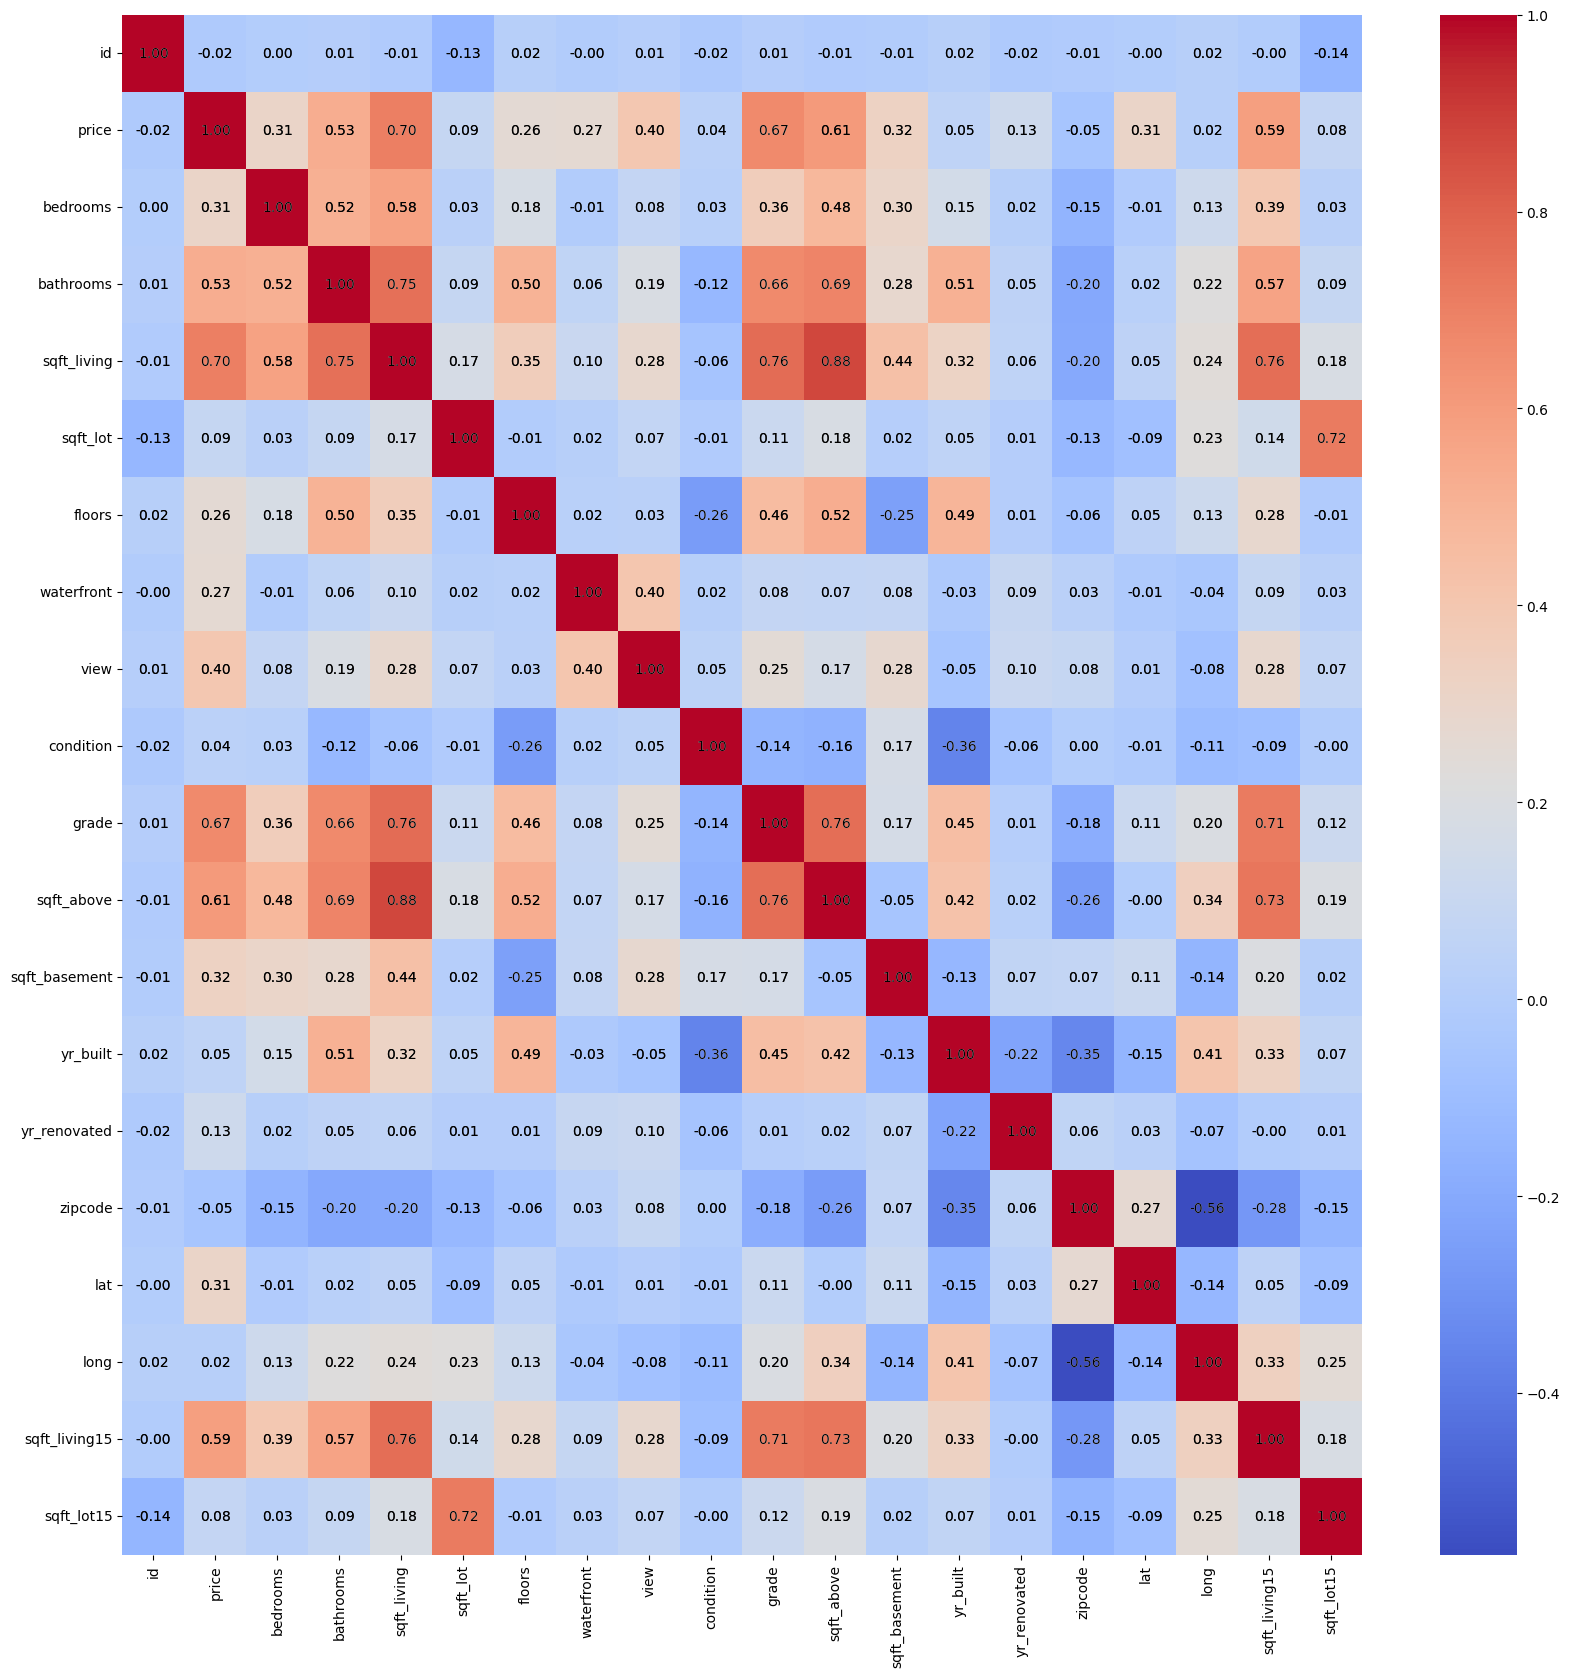

In [10]:
# Create a heatmap to visualize correlation between numerical features
f, ax = plt.subplots(figsize=(20, 20))
numeric_df = house_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()  # Compute correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)  # Add correlation coefficients

# Add correlation numbers above the heatmap
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        ax.text(j+0.5, i+0.5, "{:.2f}".format(correlation_matrix.iloc[i, j]),
                ha='center', va='center', color='black')
plt.show()

In [11]:
# Select a subset of features for analysis
house_df_sample = house_df[ ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'yr_built']   ]

In [12]:
# Display the selected features subset
house_df_sample

,price,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built
0,221900.0,3,1.00,1180,5650,1180,0,1955
1,538000.0,3,2.25,2570,7242,2170,400,1951
2,180000.0,2,1.00,770,10000,770,0,1933
3,604000.0,4,3.00,1960,5000,1050,910,1965
4,510000.0,3,2.00,1680,8080,1680,0,1987
...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,1530,0,2009
21609,400000.0,4,2.50,2310,5813,2310,0,2014
21610,402101.0,2,0.75,1020,1350,1020,0,2009
21611,400000.0,3,2.50,1600,2388,1600,0,2004


## Plot the pairplot for the features contained in "house_df_sample"


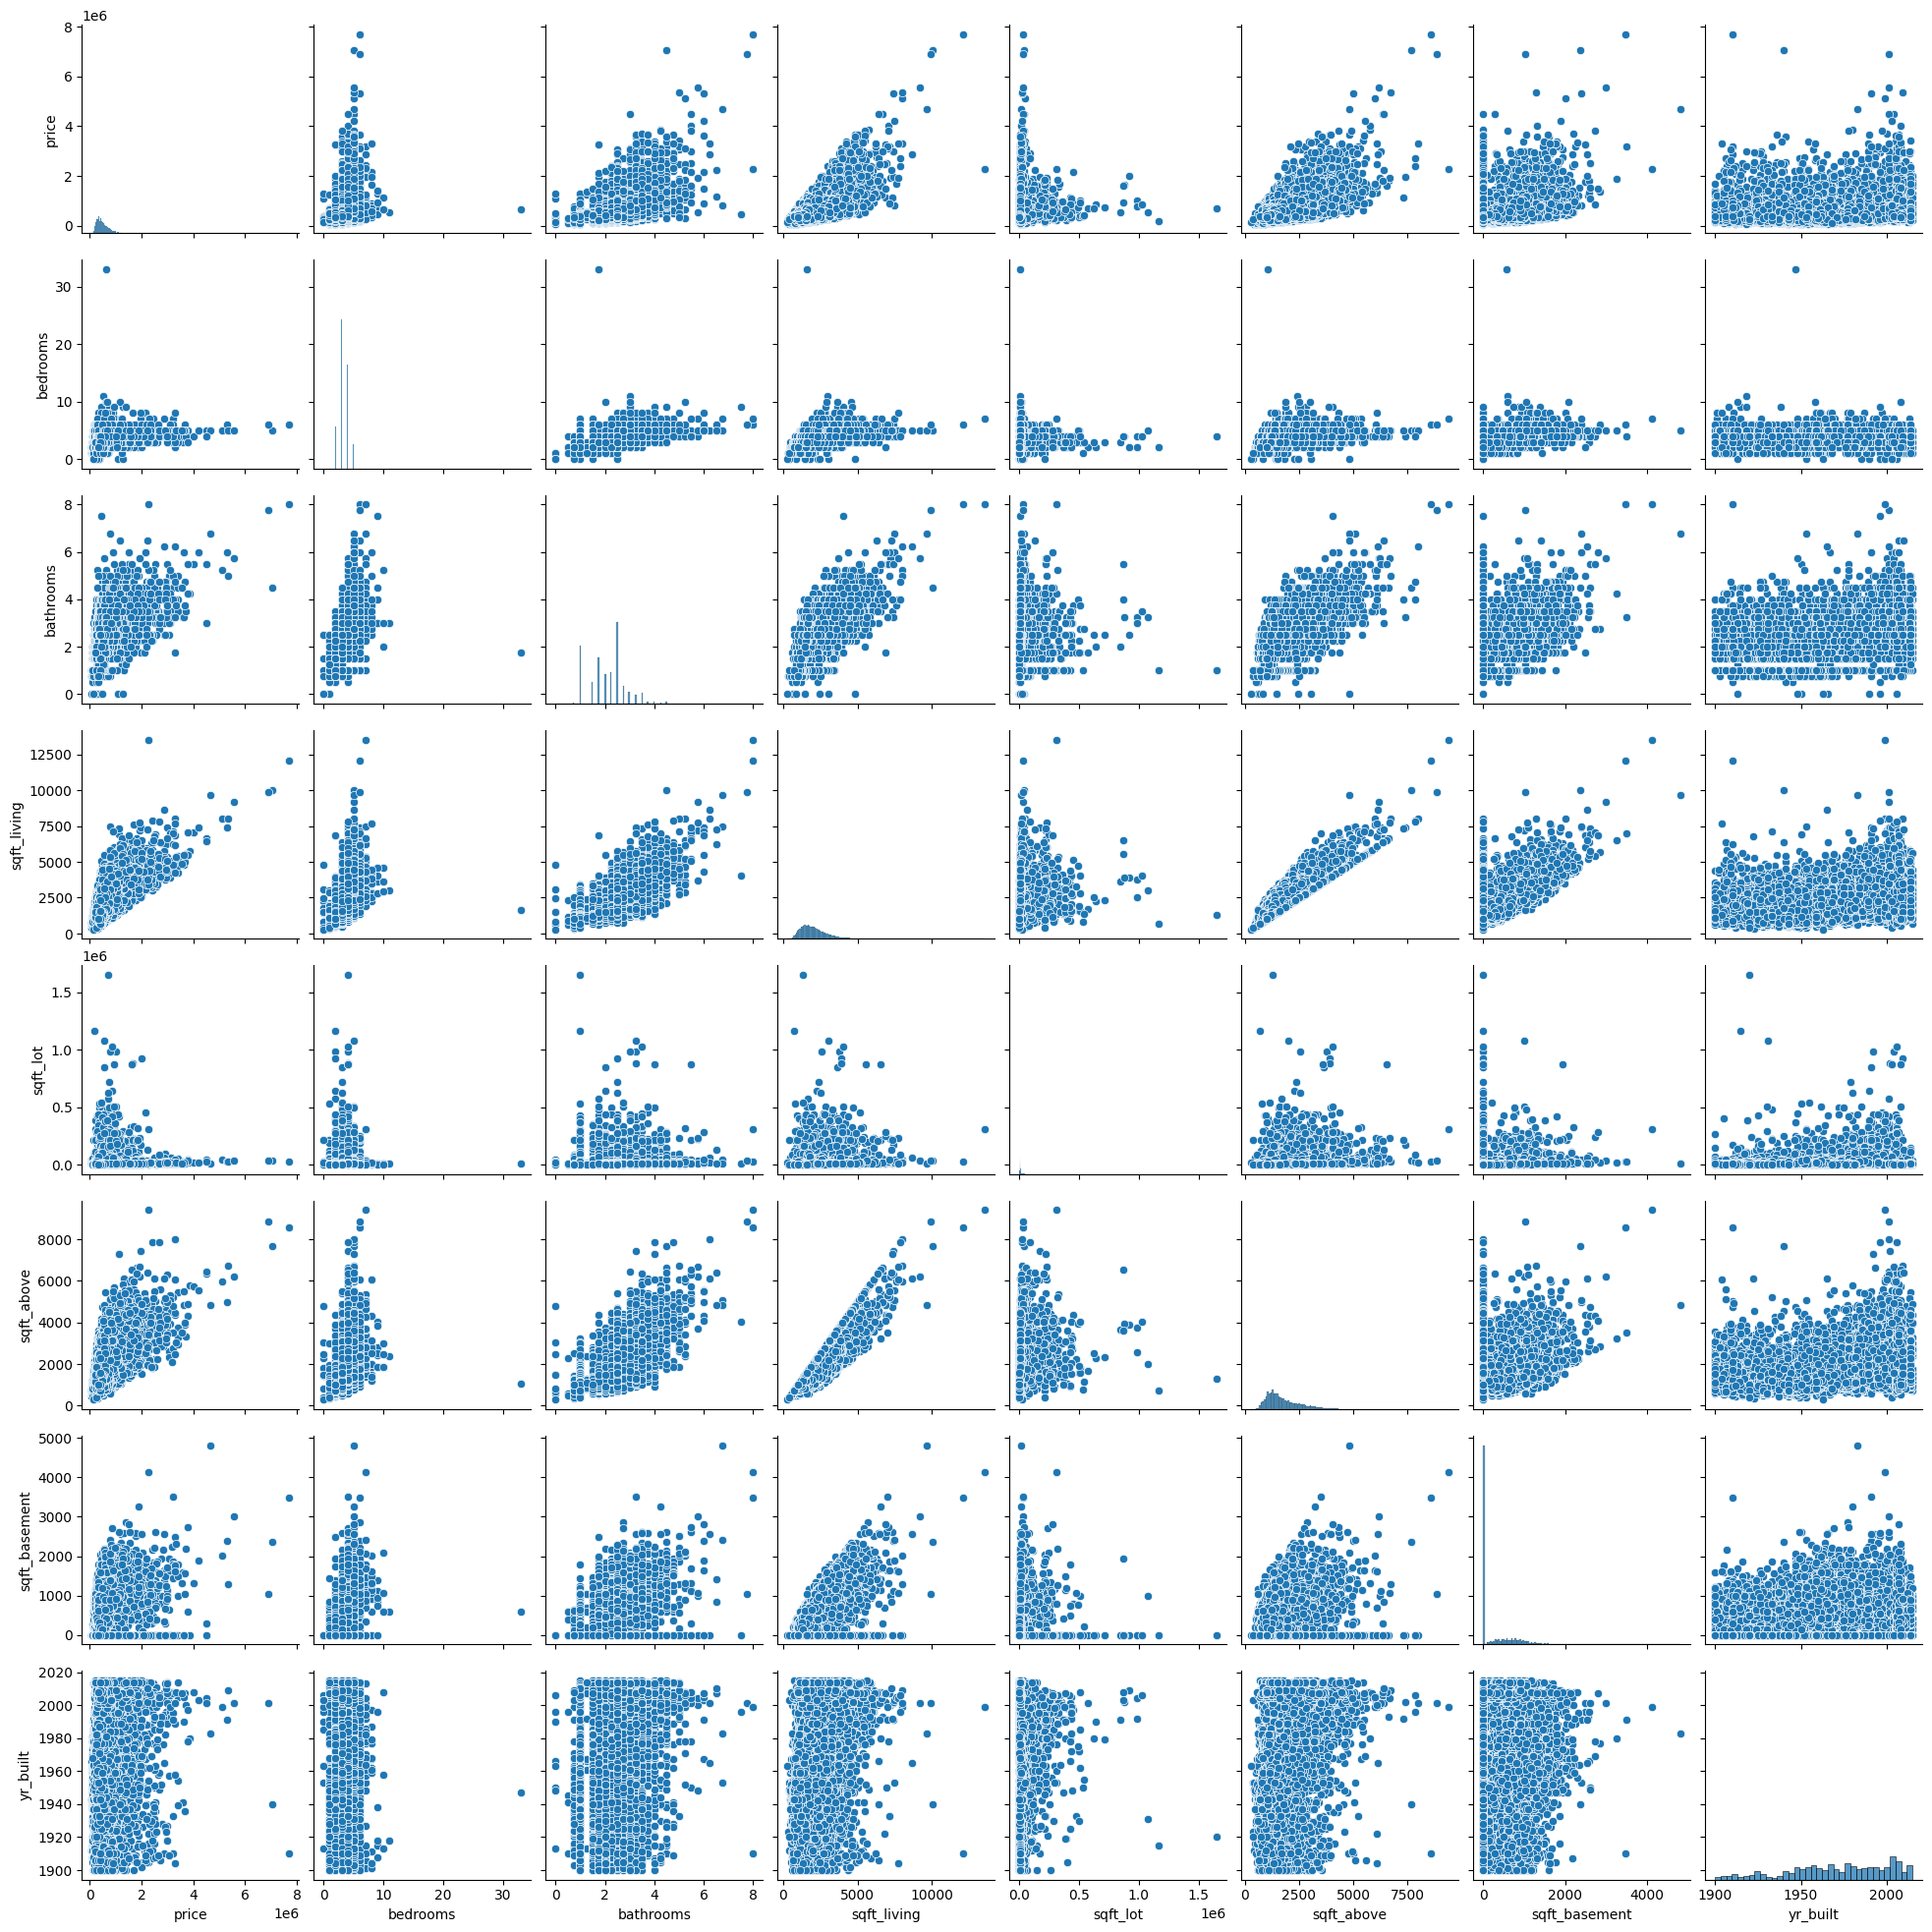

In [13]:
# Create a copy of the DataFrame
house_df_sample_copy = house_df_sample.copy()

# Replace infinite values with NaN in the copied DataFrame
house_df_sample_copy.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot a pairplot for the selected features
sns.pairplot(house_df_sample_copy)

# DATA CLEANING AND FEATURE ENGINEERING

In [14]:
# Select a subset of features for analysis
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [15]:
# Display the selected features subset
X = house_df[selected_features]

In [16]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0
...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,1530,0
21609,4,2.50,2310,5813,2.0,2310,0
21610,2,0.75,1020,1350,2.0,1020,0
21611,3,2.50,1600,2388,2.0,1600,0


In [17]:
y = house_df['price']

In [18]:
# Display the selected features subset.
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [19]:
X.shape

(21613, 7)

In [20]:
y.shape

(21613,)

In [21]:
# Scale the features using MinMaxScaler to ensure all features are on the same scale
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler and transform the features dataframe
X_scaled = scaler.fit_transform(X)

In [22]:
# Display the scaled features dataframe
X_scaled

array([[0.09090909, 0.125     , 0.06716981, ..., 0.        , 0.09758772,
        0.        ],
       [0.09090909, 0.28125   , 0.17207547, ..., 0.4       , 0.20614035,
        0.08298755],
       [0.06060606, 0.125     , 0.03622642, ..., 0.        , 0.05263158,
        0.        ],
       ...,
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ],
       [0.09090909, 0.3125    , 0.09886792, ..., 0.4       , 0.14364035,
        0.        ],
       [0.06060606, 0.09375   , 0.05509434, ..., 0.4       , 0.08004386,
        0.        ]])

In [23]:
# Display the shape of the scaled features dataframe
X_scaled.shape

(21613, 7)

In [24]:
# Display the maximum values of the scaled features
scaler.data_max_

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [25]:
# Display the minimum values of the scaled features
scaler.data_min_

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [26]:
# Reshape y to ensure compatibility with scaler
y = y.values.reshape(-1,1)

In [27]:
# Scale the target variable (price)
y_scaled = scaler.fit_transform(y)

In [28]:
# Display the scaled target variable
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

# TRAIN A DEEP LEARNING MODEL WITH LIMITED NUMBER OF FEATURES

In [29]:
# Spliting of data into training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y_scaled,test_size = 0.25)

In [30]:
# Display the shape of the training set
X_train.shape

(16209, 7)

In [31]:
# Display the shape of the testing set
X_test.shape

(5404, 7)

In [32]:
# Import necessary libraries for creating the neural network model
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network model
model = Sequential()
model.add(Dense(100, input_dim = 7, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(200, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [33]:
# Display the summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 200)               20200     
                                                                 
 dense_4 (Dense)             (None, 1)                 201       
                                                                 
Total params: 41401 (161.72 KB)
Trainable params: 41401 (161.72 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
# Compile the model
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [35]:
# Train the model and store the training history
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 2s 4ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 2/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 3/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 5/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 6/100
260/260 [==============================] - 1s 4ms/step - loss: 0.0010 - val_loss: 9.9098e-04
Epoch 7/100
260/260 [==============================] - 1s 4ms/step - loss: 9.8611e-04 - val_loss: 0.0011
Epoch 8/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 9/100
260/260 [==============================] - 1s 3ms/step - loss: 9.9407e-04 - val_loss: 9.7673e-04
Epoch 10/100
260/260 [==============================] - 1s 3ms/step - loss:

# EVALUATING TRAINED DEEP LEARNING MODEL PERFORMANCE

In [36]:
# Get the keys of the training history
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

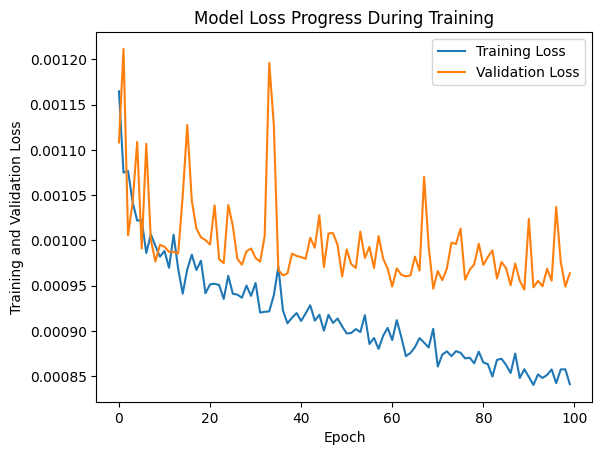

In [37]:
# Plot the training and validation loss over epochs
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss', 'Validation Loss'])

In [38]:
# Predict the price using the trained model for a sample data point

# 'bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement'
X_test_1 = np.array([[ 4, 3, 1960, 5000, 1, 2000, 3000 ]])

scaler_1 = MinMaxScaler()
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)

y_predict_1 = model.predict(X_test_scaled_1)

y_predict_1 = scaler.inverse_transform(y_predict_1)
y_predict_1

1/1 [==============================] - 0s 164ms/step


array([[197902.03]], dtype=float32)

169/169 [==============================] - 0s 1ms/step


Text(0, 0.5, 'True Values')

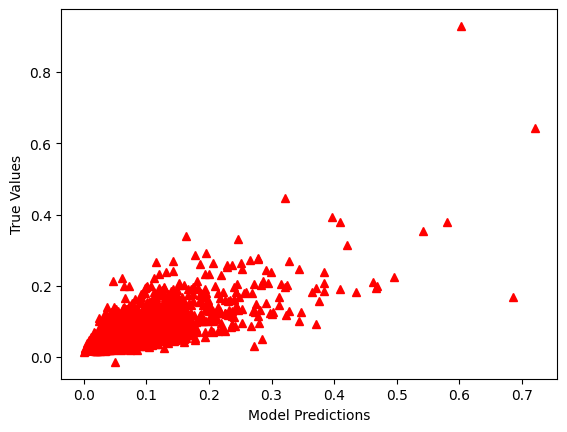

In [39]:
# Predict the price using the trained model for the test set
y_predict = model.predict(X_test)


# Plot the model predictions against the true values
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')


In [40]:
# Convert the scaled predictions and true values back to their original scale
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


(0.0, 3000000.0)

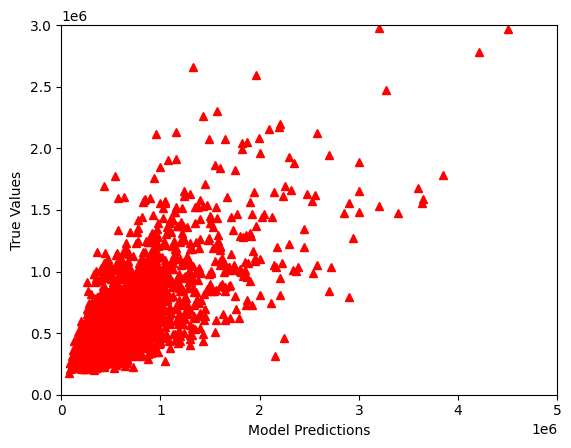

In [41]:
# Plot the original true values against the original predicted values
plt.plot(y_test_orig, y_predict_orig, "^", color = 'r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [42]:
k = X_test.shape[1]
n = len(X_test)
n

5404

In [43]:
k

7

In [44]:
# Calculate evaluation metrics for the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

# Print the evaluation metrics
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 249726.664 
MSE = 62363406712.31944 
MAE = 154343.51364368407 
R2 = 0.5681485114544005 
Adjusted R2 = 0.5675882889896453


# TRAINING AND EVALUATIN A DEEP LEARNING MODEL WITH INCREASED NUMBER OF FEATURES (INDEPENDANT VARIABLES)

In [45]:
# Selected features with increased number of independent variables

selected_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'yr_built',
'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

X = house_df[selected_features]

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Scale the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# Dependent variable (target)
y = house_df['price']

In [48]:
# Reshape the target variable
y = y.values.reshape(-1,1)

# Scale the target variable
y_scaled = scaler.fit_transform(y)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [49]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model architecture
model = Sequential()
model.add(Dense(10, input_dim = 19, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [50]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [51]:
# Train the model
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50, verbose = 1, validation_split = 0.2)

Epoch 1/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0432 - val_loss: 0.0026
Epoch 2/100
260/260 [==============================] - 1s 2ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 3/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 4/100
260/260 [==============================] - 1s 3ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 5/100
260/260 [==============================] - 1s 2ms/step - loss: 9.9278e-04 - val_loss: 0.0011
Epoch 6/100
260/260 [==============================] - 1s 3ms/step - loss: 8.9249e-04 - val_loss: 0.0010
Epoch 7/100
260/260 [==============================] - 1s 2ms/step - loss: 8.3391e-04 - val_loss: 9.6169e-04
Epoch 8/100
260/260 [==============================] - 1s 2ms/step - loss: 7.8921e-04 - val_loss: 9.1482e-04
Epoch 9/100
260/260 [==============================] - 1s 2ms/step - loss: 7.5463e-04 - val_loss: 8.6203e-04
Epoch 10/100
260/260 [==============================] - 1s 

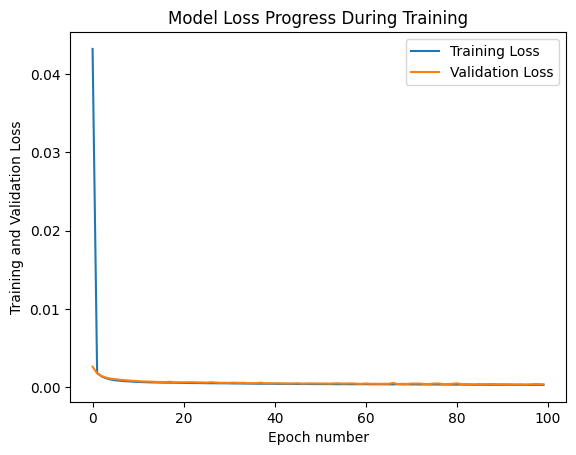

In [52]:
# Plot the loss progress during training
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.ylabel('Training and Validation Loss')
plt.xlabel('Epoch number')
plt.legend(['Training Loss', 'Validation Loss'])

169/169 [==============================] - 0s 1ms/step


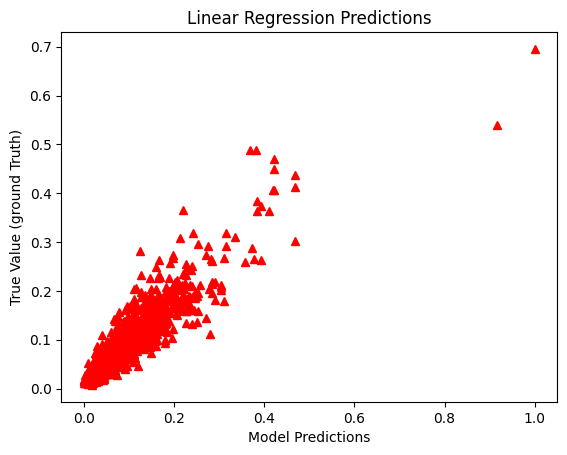

In [53]:
# Predict the price using the trained model
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = 'r')
plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Linear Regression Predictions')
plt.show()

In [54]:
# Transform scaled predictions and true values back to original scale
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


In [55]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

# Calculate evaluation metrics
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)


RMSE = 137064.146 
MSE = 18786580196.014053 
MAE = 79758.7757390359 
R2 = 0.8564875035513997 
Adjusted R2 = 0.8563013309281342


# Conclusion
The deep learning model developed for predicting real estate prices exhibits robust performance, as evidenced by the following evaluation metrics:

- **Root Mean Squared Error (RMSE):** 137,064.146
- **Mean Squared Error (MSE):** 18,786,580,196.014053
- **Mean Absolute Error (MAE):** $ 79,758.7757390359
- **R-squared (R2) Score:** 0.8564875035513997
- **Adjusted R-squared (Adjusted R2) Score:** 0.8563013309281342

These metrics serve as indicators of the model's effectiveness in capturing the variance present in the target variable (price) and in making accurate predictions. The high values of R-squared and Adjusted R-squared suggest that approximately 85% of the variance in real estate prices can be explained by the model. Additionally, the relatively low values of RMSE, MSE, and MAE indicate that, on average, the model's predictions closely align with the true values, with minimal errors.

In conclusion, the deep learning model demonstrates robust predictive performance in estimating real estate prices, thereby offering valuable insights for decision-making within the real estate market.te market.